# Rebond de Phase



## Contents

1. [Exploration de la porte-CNOT](#exploring-cnot)
2. [Phase Kickback](#kickback)     
    2.1 [Explaining the CNOT Circuit Identity](#explaining-identity)     
    2.2 [Kickback with the T-gate](#kickback-t-gate)    

## 1. Exploration de la porte-CNOT<a id="exploring-cnot"></a>

Dans la section précédente, nous avons vu quelques résultats très basiques avec la porte CNOT. Ici, nous allons explorer des résultats plus intéressants. 

Nous avons vu que nous pouvions intriquer les deux qubits en plaçant le qubit de contrôle dans l'état $|+\rangle$ :

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

Mais que se passe-t-il si on met le second qubit en superposition ?

In [1]:
!pip install qiskit
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

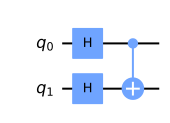

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

Dans le circuit ci-dessus, nous avons la CNOT qui agit sur l'état :

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Puisque la CNOT échange les amplitudes de $|01\rangle$ et $|11\rangle$, nous ne voyons aucun changement :

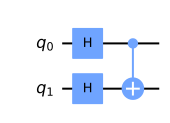

<IPython.core.display.Latex object>

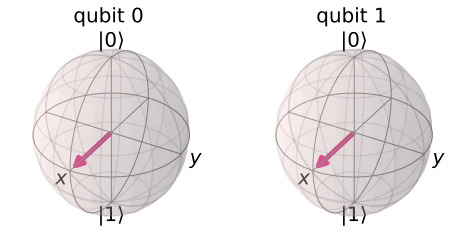

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())  # `display` est une commande pour les notebooks Jupyter
                    # similaire a `print`, mais pour des contenus plus riches.

# Regardons les resultats
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)


Essayons de mettre le qubit target dans l'état $|-\rangle$, pour qu'il ait une phase négative :

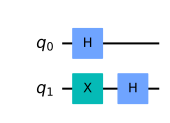

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

Cela créer l'état :

$$ |{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$

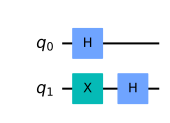

<IPython.core.display.Latex object>

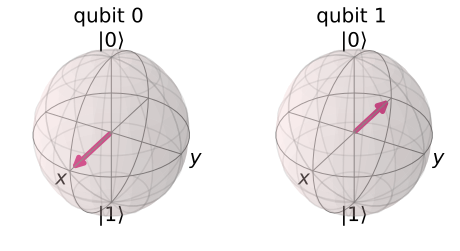

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# Regardons le résultat
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Si la CNOT agit sur cet état, nous échangerons les amplitudes de $|01\rangle$ et $|11\rangle$, ce qui donnera l'état :

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned}
$$

Ce résultat est intéressant, car il affecte l'état du qubit _control_ tout en laissant l'état du qubit _target_ inchangé. 

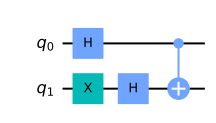

<IPython.core.display.Latex object>

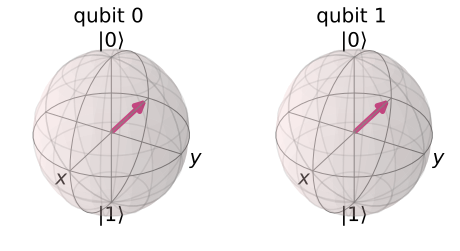

In [7]:
qc.cx(0,1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Si l'on se souvient des transformations porte-H $|{+}\rangle \rightarrow |0\rangle$ et $|{-}\rangle \rightarrow |1\rangle$, on peut voir qu'envelopper un CNOT dans des portes-H a le comportement équivalent d'un CNOT agissant dans la direction opposée : 

![cnot_identity](https://qiskit.org/textbook/ch-gates/images/identities_1.svg)

Nous pouvons vérifier cela en utilisant le simulateur Aer de Qiskit :

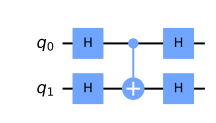

<IPython.core.display.Latex object>

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

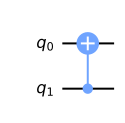

<IPython.core.display.Latex object>

In [9]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

Cette identité est un exemple de "rebond de phase", ce qui nous amène à la section suivante... 

## 2. Rebond de Phase <a id="kickback"></a>

### 2.1  Explication de l'identité du circuit CNOT <a id="explaining-identity"></a>
Dans la section précédente, nous avons vu cette identité :

![cnot_identity](https://qiskit.org/textbook/ch-gates/images/identities_1.svg)

Il s'agit d'un exemple de _rebond_ (ou, _rebond de phase_ ) qui est très important et est utilisé dans presque tous les algorithmes quantiques. Le rebond est le cas où la valeur propre ajoutée par une porte à un qubit est "renvoyée" dans un autre qubit par une opération contrôlée. Par exemple, nous avons vu que l'exécution d'une porte X sur un qubit $|{-}\rangle$ lui donne la phase $-1$ :

$$
X|{-}\rangle = -|{-}\rangle
$$

Lorsque notre qubit de contrôle est en $|0\rangle$ ou en $|1\rangle$, cette phase affecte l'état entier, cependant c'est une phase globale et n'a aucun effet observable :

$$
\begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned}
$$

L'effet intéressant est que lorsque notre qubit de contrôle est en superposition, la composante du qubit de contrôle qui se trouve dans la direction de $|1\rangle$ applique ce facteur de phase au qubit cible, qui à son tour renvoie une phase relative à notre qubit de contrôle :

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned}
$$

Cela peut alors s'écrire comme les deux états de qubit séparables :

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = |{-}\rangle \otimes \tfrac{1}{\sqrt{2}}(|{0}\rangle - |1\rangle )\\
                           & = |{-}{-}\rangle \\
\end{aligned}
$$

Envelopper le CNOT dans des portes H transforme les qubits de la base de calcul à la base $(|+\rangle, |-\rangle)$, où nous voyons cet effet. Cette identité est très utile dans le hardware, puisque certains hardwares ne permettent que des CNOTs dans une seule direction entre deux qubits spécifiques. Nous pouvons utiliser cette identité pour surmonter ce problème et permettre les CNOTs dans les deux directions.

### 2.2 Rebond avec la porte-T <a id="kickback-t-gate"></a>

Examinons une autre opération contrôlée, la porte en T contrôlée : 


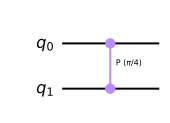

In [10]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

La porte-T a la matrice :

$$
\text{T} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix}
$$

Et la porte-T contrôlée possède la matrice :

$$
\text{Controlled-T} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix}
$$

Nous pouvons vérifier cela en utilisant le simulateur Aer de Qiskit :

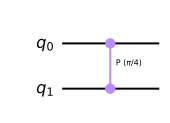

<IPython.core.display.Latex object>

In [11]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

Plus généralement, nous pouvons trouver la matrice de toute opération U-contrôlée en utilisant la règle :
$$
\begin{aligned}
\text{U} & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$

Ou, en utilisant l'ordre des qubits de Qiskit :

$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$


Si nous appliquons le T-gate à un qubit dans l'état $|1\rangle$, nous ajoutons une phase de $e^{i\pi/4}$ à ce qubit :

$$
T|1\rangle = e^{i\pi/4}|1\rangle
$$
Il s'agit d'une _phase globale_ et elle est inobservable. Mais si nous contrôlons cette opération en utilisant un autre qubit dans l'état $|{+}\rangle$, la phase n'est plus globale mais relative, ce qui change la _phase relative_ de notre qubit de contrôle :

$$
\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned}
$$

Cela a pour effet de faire tourner notre qubit de contrôle autour de l'axe Z de la sphère de Bloch, tout en laissant le qubit cible inchangé. Voyons cela dans Qiskit :

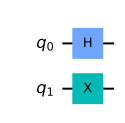

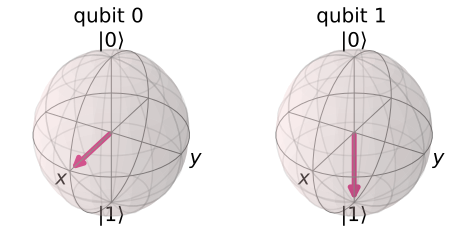

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

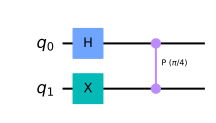

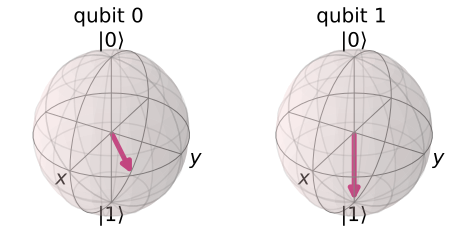

In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Ajoutons un T-Controllé
qc.cp(pi/4, 0, 1)
display(qc.draw())
# Regardons le résultat :
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

Nous pouvons voir que le qubit le plus à gauche a été tourné de $\pi/4$ autour de l'axe Z de la sphère de Bloch comme prévu. Après avoir exploré ce comportement, on peut comprendre pourquoi Qiskit dessine les portes de rotation Z contrôlée de cette manière symétrique (deux contrôles au lieu d'un contrôle et d'une cible). Il n'y a pas de qubit de contrôle ou de cible clair pour tous les cas.


### Exercises:


Quel serait l'état résultant du qubit de contrôle (q0) si le qubit cible (q1) était dans l'état $|0\rangle$ ? (comme indiqué dans le circuit ci-dessous) ? Utilisez Qiskit pour vérifier votre réponse.



Que se passerait-il pour le qubit de contrôle (q0) si le qubit cible (q1) était dans l'état $|1\rangle$, et que le circuit utilisait une porte Sdg contrôlée au lieu du T contrôlé (comme indiqué dans le circuit ci-dessous) ?



Que se passerait-il pour le qubit de contrôle (q0) s'il était dans l'état $|1\rangle$ au lieu de l'état $|{+}\rangle$ avant l'application du T contrôlé (comme indiqué dans le circuit ci-dessous) ?
